# CASTEP DNA benchmark performance

This notebook compares the performance of the large DNA benchmark across different HPC facilities.

We compute the mean time per SCF cycle from all cycles in the output file apart from the fastest and slowest cycle times. Performance is plotted as SCF cycles per second.

## Setup section

Import the required modules and define useful functions.

In [25]:
import matplotlib as mpl
import numpy as np
from scipy import interpolate
from matplotlib import pyplot as plt
%matplotlib inline
mpl.rcParams['figure.figsize'] = (12,6)
import seaborn as sns
sns.set(font_scale=1.5, context="paper", style="white", font="serif")
pal = sns.color_palette()
cols = pal.as_hex()

In [26]:
import sys
sys.path.append('../../../python-modules')

In [27]:
from appanalysis import castep

## Read performance from output files and compute performance

### Cirrus

In [28]:
cirruscpn = 36
cirrusfiles_1t = {70:'../DNA/results/Cirrus/18.1.0_intel17_mpt216/polyA20-no-wat.castep.70nodes.1threads',
                  128:'../DNA/results/Cirrus/18.1.0_intel17_mpt216/polyA20-no-wat.castep.128nodes.1threads'}
cirrusfiles_6t = {70:'../DNA/results/Cirrus/16.11_intel17_mpt214/polyA20-no-wat.castep.70nodes.6threads',
                  135:'../DNA/results/Cirrus/16.11_intel17_mpt214/polyA20-no-wat.castep.135nodes.6threads',
                  272:'../DNA/results/Cirrus/16.11_intel17_mpt214/polyA20-no-wat.castep.272nodes.6threads'}

In [29]:
print("1 Thread:")
cirrusnodes_1t, cirrusscf_1t, cirrusperf_1t = castep.calcperf(cirrusfiles_1t, cirruscpn)
print("6 Threads:")
cirrusnodes_6t, cirrusscf_6t, cirrusperf_6t = castep.calcperf(cirrusfiles_6t, cirruscpn)

1 Thread:
          Nodes           Cores    Mean SCF (s) Performance (SCF cycles/s)
          =====           =====    ============ ==========================
             70            2520          2095.3                   0.000477
            128            4608          1493.6                   0.000670
6 Threads:
          Nodes           Cores    Mean SCF (s) Performance (SCF cycles/s)
          =====           =====    ============ ==========================
             70            2520          2038.3                   0.000491
            135            4860          1256.8                   0.000796
            272            9792           870.8                   0.001148


### ARCHER

In [30]:
archercpn = 24
archerfiles_1t = {256:'../DNA/results/ARCHER/polyA20-no-wat.castep.256nodes.1threads.201805300710',
                  512:'../DNA/results/ARCHER/polyA20-no-wat.castep.512nodes.1threads.201805301420',
                  1024:'../DNA/results/ARCHER/polyA20-no-wat.castep.1024nodes.1threads.201805302113'}
archerfiles_2t = {128:'../DNA/results/ARCHER/polyA20-no-wat.castep.128nodes.2threads.201806010847',
                  256:'../DNA/results/ARCHER/polyA20-no-wat.castep.256nodes.2threads.201806071139',
                  512:'../DNA/results/ARCHER/polyA20-no-wat.castep.512nodes.2threads.201806071646'}
archerfiles_6t = {100:'../DNA/results/ARCHER/polyA20-no-wat.castep.100nodes.6threads',
               125:'../DNA/results/ARCHER/polyA20-no-wat.castep.125nodes.6threads',
               250:'../DNA/results/ARCHER/polyA20-no-wat.castep.250nodes.6threads',
               500:'../DNA/results/ARCHER/polyA20-no-wat.castep.500nodes.6threads',
               1000:'../DNA/results/ARCHER/polyA20-no-wat.castep.1000nodes.6threads',
               2000:'../DNA/results/ARCHER/polyA20-no-wat.castep.2000nodes.6threads'}

In [31]:
print("1 Thread:")
archernodes_1t, archerscf_1t, archerperf_1t = castep.calcperf(archerfiles_1t, archercpn)
print("2 Threads:")
archernodes_2t, archerscf_2t, archerperf_2t = castep.calcperf(archerfiles_2t, archercpn)
print("6 Threads:")
archernodes_6t, archerscf_6t, archerperf_6t = castep.calcperf(archerfiles_6t, archercpn)

1 Thread:
          Nodes           Cores    Mean SCF (s) Performance (SCF cycles/s)
          =====           =====    ============ ==========================
            256            6144           388.5                   0.002574
            512           12288           233.8                   0.004277
           1024           24576           143.5                   0.006967
2 Threads:
          Nodes           Cores    Mean SCF (s) Performance (SCF cycles/s)
          =====           =====    ============ ==========================
            128            3072           823.8                   0.001214
            256            6144           384.1                   0.002603
            512           12288           263.3                   0.003797
6 Threads:
          Nodes           Cores    Mean SCF (s) Performance (SCF cycles/s)
          =====           =====    ============ ==========================
            100            2400          1416.3                   0.

### Tesseract

In [32]:
tesscpn = 24
tessfiles_6t = {64:'../DNA/results/Tesseract/polyA20-no-wat_64nodes_6threads_201805181413.castep',
                128:'../DNA/results/Tesseract/polyA20-no-wat_128nodes_6threads_201805181545.castep',
                256:'../DNA/results/Tesseract/polyA20-no-wat_256nodes_6threads_201805211258.castep'
               }

In [33]:
print("6 Threads:")
tessnodes_6t, tessscf_6t, tessperf_6t = castep.calcperf(tessfiles_6t, tesscpn)

6 Threads:
          Nodes           Cores    Mean SCF (s) Performance (SCF cycles/s)
          =====           =====    ============ ==========================
             64            1536          2450.2                   0.000408
            128            3072          1247.8                   0.000801
            256            6144           866.7                   0.001154


### Peta4-Skylake

Results provided by Jeffrey Salmond, RSE group leader, CSD3, Cambridge. Raw output files not available yet, just the performance numbers.

In [34]:
csd3cpn = 32
csd3nodes_1t = [16,32,64,128,192,256]
csd3scf_1t = [902.97,734.15,545.03,250.38,253.43,404.16]
csd3perf_1t = [1/x for x in csd3scf_1t]

print("1 Thread:")
print("{:>15s} {:>15s} {:>15s} {:>26s}".format('Nodes', 'Cores', 'Mean SCF (s)', 'Performance (SCF cycles/s)'))
print("{:>15s} {:>15s} {:>15s} {:>26s}".format('=====', '=====', '============', '=========================='))
for i, nodes in enumerate(csd3nodes_1t):
    print("{:>15d} {:>15d} {:>15.1f} {:>26.6f}".format(nodes, nodes*csd3cpn, csd3scf_1t[i], csd3perf_1t[i]))

1 Thread:
          Nodes           Cores    Mean SCF (s) Performance (SCF cycles/s)
          =====           =====    ============ ==========================
             16             512           903.0                   0.001107
             32            1024           734.1                   0.001362
             64            2048           545.0                   0.001835
            128            4096           250.4                   0.003994
            192            6144           253.4                   0.003946
            256            8192           404.2                   0.002474


## Performance Comparison

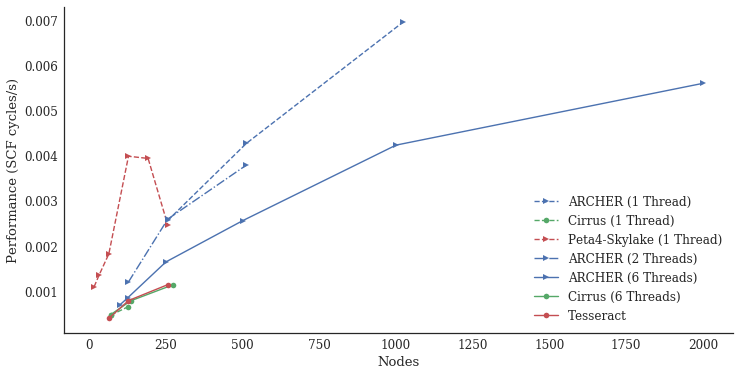

In [36]:
plt.plot(archernodes_1t, archerperf_1t, '>--', color=cols[0], label='ARCHER (1 Thread)')
plt.plot(cirrusnodes_1t, cirrusperf_1t, 'o--', color=cols[1], label='Cirrus (1 Thread)')
plt.plot(csd3nodes_1t, csd3perf_1t, '>--', color=cols[2], label='Peta4-Skylake (1 Thread)')
plt.plot(archernodes_2t, archerperf_2t, '>-.', color=cols[0], label='ARCHER (2 Threads)')
plt.plot(archernodes_6t, archerperf_6t, '>-', color=cols[0], label='ARCHER (6 Threads)')
plt.plot(cirrusnodes_6t, cirrusperf_6t, 'o-', color=cols[1], label='Cirrus (6 Threads)')
plt.plot(tessnodes_6t, tessperf_6t, 'o-', color=cols[2], label='Tesseract')
plt.xlabel('Nodes')
plt.ylabel('Performance (SCF cycles/s)')
plt.legend(loc='best')
sns.despine()
plt.savefig('CASTEP_DNA_perf.png', dpi=300)